<a href="https://colab.research.google.com/github/pragnavi/Deep-Learning/blob/main/DL_HW1_Q4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Required Packages**

Importing required packages including torchvison for data and matplotlib for plotting.

In [ ]:
import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

**Loading Data**

Importing training and test data sets from the FashinMNIST using torchvision library.

In [ ]:
# Load the FashionMNIST dataset
trainingdata = torchvision.datasets.FashionMNIST(root='./data', train=True, download=True, transform=torchvision.transforms.ToTensor())
testdata = torchvision.datasets.FashionMNIST(root='./data', train=False, download=True, transform=torchvision.transforms.ToTensor())

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



**Model Definition**

Defining Neural Network model that can be used to train and test on the FashionMNIST training and test data sets.

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 10)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = x.view(-1, 784)
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.relu(self.fc3(x))
        x = self.fc4(x)
        return x

**Hyperparameters**

Setting the hyperparameters batch size, learning rate and number of epochs required to train and test the model on the FashionMNIST data. Choosing epoch count and learning step size such that reasonable accuracy is achieved.

In [ ]:
epoch_count = 30
step_size = 0.01
batch_size = 128

**Data Loaders**

Creating training and test data loaders using the batch size parameter.

In [ ]:
trainingloader = torch.utils.data.DataLoader(trainingdata, batch_size=batch_size, shuffle=True)
testloader = torch.utils.data.DataLoader(testdata, batch_size=batch_size, shuffle=False)

**Model Initialization**

Initializing the defined model and ADAM optimizer.

In [ ]:
model = Net()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=step_size)

**Display Model**

Printing the model.

In [ ]:
print(model)

Net(
  (fc1): Linear(in_features=784, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
  (relu): ReLU()
)


**Training and Test**

Training the model on the training data and evaluating the model on the test data from FashionMNIST dataset and displaying the training loss, test loss and test accuracy at each epoch.

In [ ]:
training_losses = []
test_losses = []
for epoch in range(epoch_count):
  #Training
    training_loss = 0.0
    for i, data in enumerate(trainingloader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        training_loss += loss.item() * inputs.size(0)
    training_loss /= len(trainingloader.dataset)
    training_losses.append(training_loss)

    # Test
    test_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for data in testloader:
            inputs, labels = data
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            test_loss += loss.item() * inputs.size(0)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    test_loss /= len(testloader.dataset)
    test_losses.append(test_loss)
    test_accuracy = 100 * correct / total

    # Debug
    print('Epoch Number[%d/%d], Training Loss: %.4f, Test Loss: %.4f, Test Accuracy: %.2f' % (epoch+1, epoch_count, training_loss, test_loss, test_accuracy))


Epoch Number[1/30], Training Loss: 0.5459, Test Loss: 0.4246, Test Accuracy: 84.05
Epoch Number[2/30], Training Loss: 0.4003, Test Loss: 0.4141, Test Accuracy: 84.77
Epoch Number[3/30], Training Loss: 0.3798, Test Loss: 0.4171, Test Accuracy: 85.58
Epoch Number[4/30], Training Loss: 0.3562, Test Loss: 0.4070, Test Accuracy: 85.42
Epoch Number[5/30], Training Loss: 0.3456, Test Loss: 0.4201, Test Accuracy: 85.48
Epoch Number[6/30], Training Loss: 0.3313, Test Loss: 0.3982, Test Accuracy: 85.87
Epoch Number[7/30], Training Loss: 0.3282, Test Loss: 0.3894, Test Accuracy: 86.98
Epoch Number[8/30], Training Loss: 0.3249, Test Loss: 0.3851, Test Accuracy: 86.70
Epoch Number[9/30], Training Loss: 0.3185, Test Loss: 0.3784, Test Accuracy: 86.86
Epoch Number[10/30], Training Loss: 0.3062, Test Loss: 0.3805, Test Accuracy: 86.93
Epoch Number[11/30], Training Loss: 0.3124, Test Loss: 0.3943, Test Accuracy: 86.53
Epoch Number[12/30], Training Loss: 0.3007, Test Loss: 0.3880, Test Accuracy: 87.21
E

**Plot Visualization**

Plotting the training loss vs test loss curve.

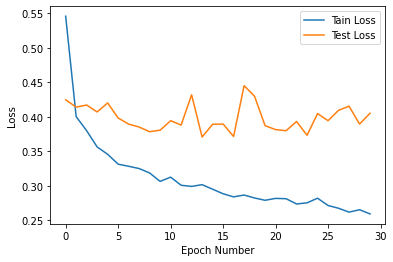

In [ ]:
plt.plot(training_losses, label='Tain Loss')
plt.plot(test_losses, label='Test Loss')
plt.legend()
plt.xlabel('Epoch Number')
plt.ylabel('Loss')
plt.show()

**Check Sample Data**

Get some samples of actual test data and their predicted class probabilities using our model.

In [ ]:
classes = ('T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot')
for i in range(5):
    image = iter(testloader)
    images, labels = next(image)
    outputs = model(images)
    _, predicted = torch.max(outputs, 1)
    probs = nn.functional.softmax(outputs, dim=1).detach().numpy()

**Visualizing Sample Data**

Visualizing some samples of actual test data and their predicted outcome using our model.

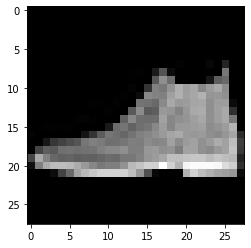

Actual Label: Ankle boot
Predicted Label: Ankle boot


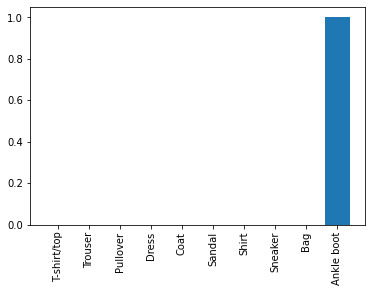

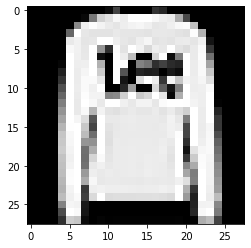

Actual Label: Pullover
Predicted Label: Pullover


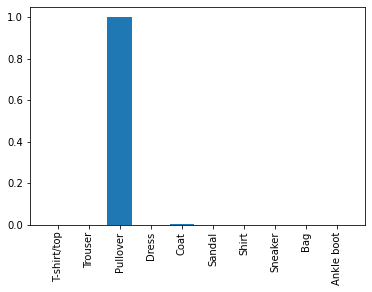

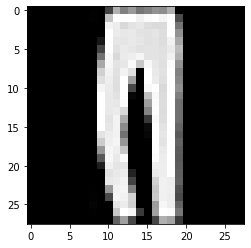

Actual Label: Trouser
Predicted Label: Trouser


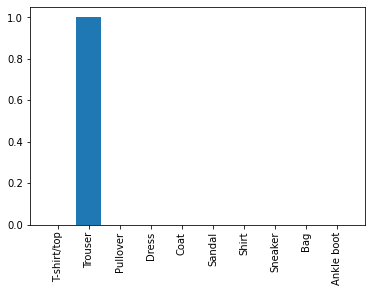

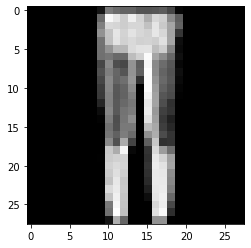

Actual Label: Trouser
Predicted Label: Trouser


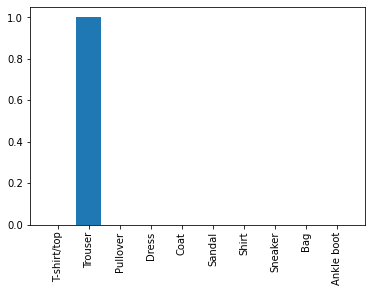

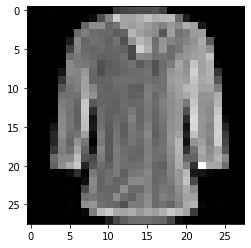

Actual Label: Shirt
Predicted Label: Shirt


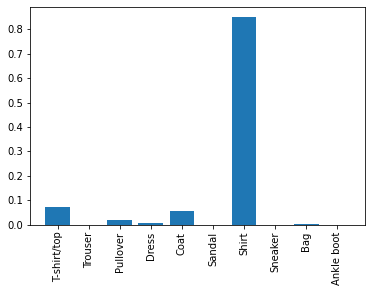

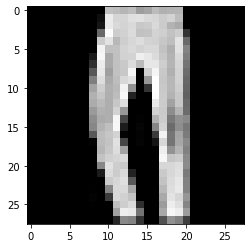

Actual Label: Trouser
Predicted Label: Trouser


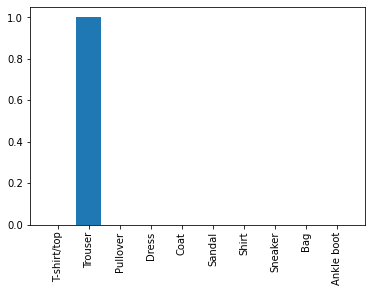

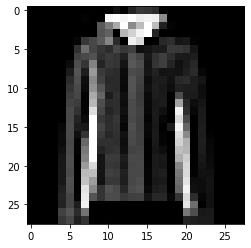

Actual Label: Coat
Predicted Label: Coat


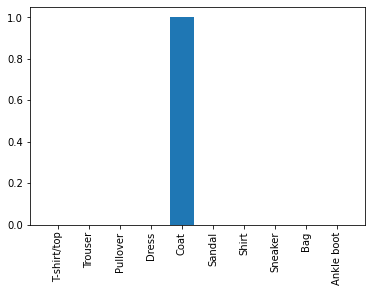

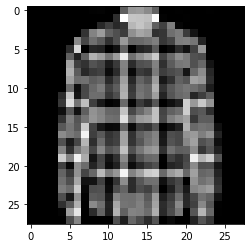

Actual Label: Shirt
Predicted Label: Shirt


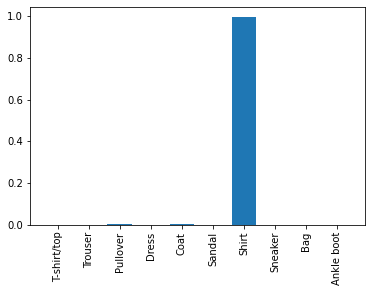

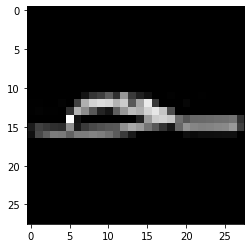

Actual Label: Sandal
Predicted Label: Sandal


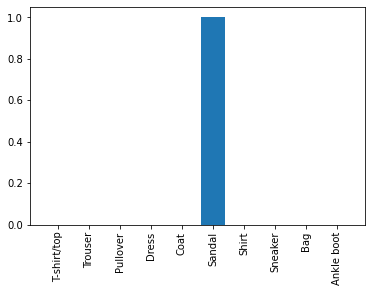

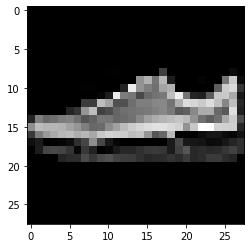

Actual Label: Sneaker
Predicted Label: Sneaker


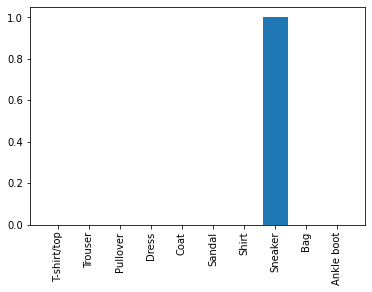

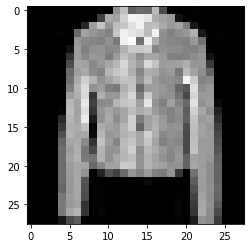

Actual Label: Coat
Predicted Label: Coat


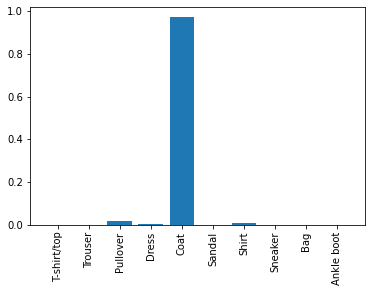

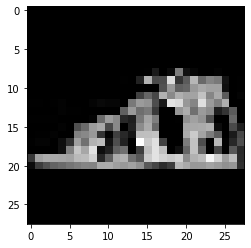

Actual Label: Sandal
Predicted Label: Sandal


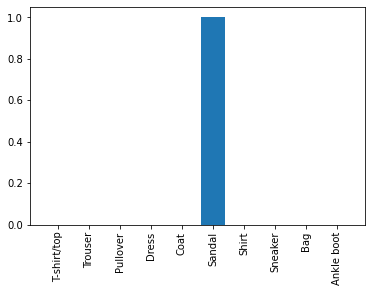

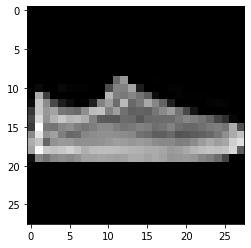

Actual Label: Sneaker
Predicted Label: Sandal


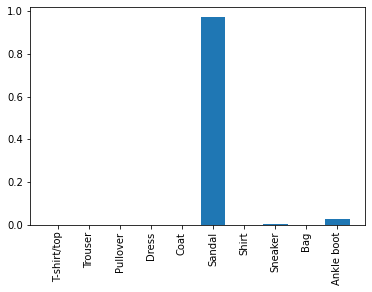

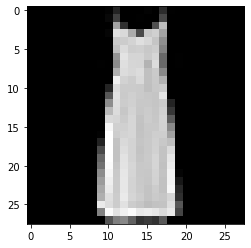

Actual Label: Dress
Predicted Label: Dress


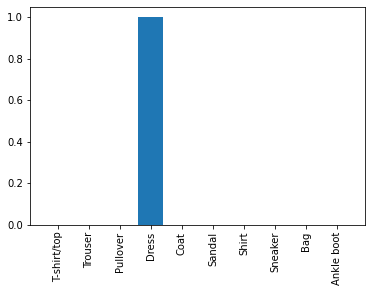

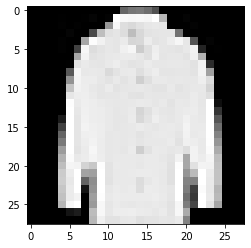

Actual Label: Coat
Predicted Label: Coat


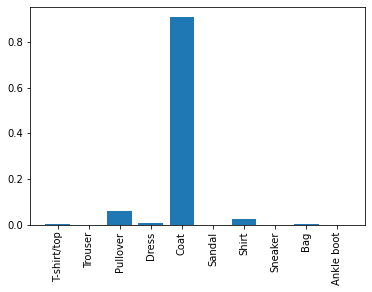

In [ ]:
for i in range(15):
    plt.imshow(images[i].squeeze(), cmap='gray')
    plt.show()
    print('Actual Label:', classes[labels[i]])
    print('Predicted Label:', classes[predicted[i]])
    plt.bar(range(10), probs[i])
    plt.xticks(range(10), classes, rotation=90)
    plt.show()